# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [135]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sjjb/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [136]:
load_dotenv()

True

In [137]:
# Read your api key environment variable
api = os.getenv('newsapi')

In [138]:
# Create a newsapi client
#newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])
newsapi = NewsApiClient(api_key=api)
newsapi

In [139]:
# Fetch the Bitcoin news articles
btc_article = newsapi.get_everything(
    q='bitcoin',language='en',sort_by='relevancy')
print(f"Total articles about Bitcion: {btc_article['totalResults']}")

#Show sample article
btc_article['articles'][0]

#btc_article

Total articles about Bitcion: 12686


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/saqib-shah',
 'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
 'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
 'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
 'publishedAt': '2021-06-09T12:04:40Z',
 'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"}

In [140]:
# Fetch the Ethereum news articles
eth_article =  newsapi.get_everything(
    q='ethereum',language='en',sort_by='relevancy')
print(f"Total articles about Ethereum: {btc_article['totalResults']}")

#Show sample article
eth_article['articles'][0]
#eth_article

Total articles about Ethereum: 12686


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'This blockchain development course bundle is on sale for 97% off',
 'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
 'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
 'publishedAt': '2021-06-17T04:05:00Z',
 'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars

In [141]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_article['articles']:
    try:
        text = article["content"]
        description = article["description"]
        title = article["title"]
        date = article["publishedAt"][:10]
        #create sentment scores
        sentiment = analyzer.polarity_scores(description)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "description": description,
            "text": text,
            "title": title,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["description","date","title", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()    

,description,date,title,text,compound,positive,negative,neutral
0,El Salvador has voted to adopt Bitcoin as lega...,2021-06-09,El Salvador becomes the first country to appro...,El Salvador's President Nayib Bukele has made ...,0.2960,0.286,0.000,0.714
1,El Salvador has become the first country in th...,2021-06-09,El Salvador Becomes First Country to Recognize...,El Salvador has become the first country in th...,0.4005,0.092,0.031,0.877
2,Cryptocurrency exchange Coinbase is experienci...,2021-05-19,Coinbase is down amid massive cryptocurrency p...,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.000,1.000
3,The Tesla and SpaceX billionaire has sent Doge...,2021-05-17,Elon Musk Tweets—and Crypto Markets Show Their...,"Last week, whenElon Musk tweeted that he had s...",-0.4215,0.000,0.147,0.853
4,"It's all about clean energy, it seems. \nElon ...",2021-06-14,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \r\nElo...",0.8074,0.189,0.000,0.811


In [142]:
# Create the Ethereum sentiment scores DataFrame

eth_sentiments = []

for article in eth_article['articles']:
    try:
        text = article["content"]
        description = article["description"]
        title = article["title"]
        date = article["publishedAt"][:10]
        #create sentment scores
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "title": title,
            "description" : description,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date","title","description", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()    

,date,title,description,text,compound,positive,negative,neutral
0,2021-06-17,This blockchain development course bundle is o...,TL;DR: The Cryptocurrency with Ethereum and So...,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000
1,2021-05-19,Bitcoin crashes as investors fear crypto bull ...,"Bitcoin, Ethereum and a host of Altcoins suffe...","Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
2,2021-05-20,Ethereum's 27-year-old founder says we're in a...,Vitalik Buterin is the 27-year-old co-founder ...,,0.0000,0.000,0.000,0.000
3,2021-05-19,Ethereum cryptocurrency to slash carbon emissions,Project says it is months away from new infras...,"Ethereum, the second largest cryptocurrency af...",-0.2732,0.000,0.068,0.932
4,2021-05-31,Ethereum extends gains to rise 8%; bitcoin fir...,Cryptocurrency Ethereum extended gains to rise...,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000


In [143]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.045515,0.066250,0.055150,0.878550
std,0.462564,0.080801,0.082628,0.091933
min,-0.722700,0.000000,0.000000,0.698000
25%,-0.292875,0.000000,0.000000,0.826750
50%,0.000000,0.040000,0.000000,0.877000
75%,0.423850,0.122000,0.086500,0.960000
max,0.807400,0.286000,0.302000,1.000000


In [144]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.092850,0.033150,0.050600,0.866250
std,0.353291,0.049434,0.077435,0.220665
min,-0.868900,0.000000,0.000000,0.000000
25%,-0.345300,0.000000,0.000000,0.838250
50%,0.000000,0.000000,0.000000,0.932000
75%,0.032000,0.066250,0.081750,1.000000
max,0.670500,0.188000,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum is the highest positive mean at .07

Q: Which coin had the highest compound score?

A: AS expected Bitcion as the maximum compound at 0.84

Q. Which coin had the highest positive score?

A: Again Bitcoin as the max at 0.282

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [145]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [146]:
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [147]:
# Create a new tokens column for Bitcoin
btc_df['btc_tokens'] = btc_df.apply(lambda x : tokenizer(x['text']), axis=1)
btc_df.head(5)

,description,date,title,text,compound,positive,negative,neutral,btc_tokens
0,El Salvador has voted to adopt Bitcoin as lega...,2021-06-09,El Salvador becomes the first country to appro...,El Salvador's President Nayib Bukele has made ...,0.2960,0.286,0.000,0.714,"el, salvador, president, nayib, bukele, made, ..."
1,El Salvador has become the first country in th...,2021-06-09,El Salvador Becomes First Country to Recognize...,El Salvador has become the first country in th...,0.4005,0.092,0.031,0.877,"el, salvador, become, first, country, world, r..."
2,Cryptocurrency exchange Coinbase is experienci...,2021-05-19,Coinbase is down amid massive cryptocurrency p...,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.000,1.000,"illustration, alex, castro, verge, cryptocurre..."
3,The Tesla and SpaceX billionaire has sent Doge...,2021-05-17,Elon Musk Tweets—and Crypto Markets Show Their...,"Last week, whenElon Musk tweeted that he had s...",-0.4215,0.000,0.147,0.853,"last, week, whenelon, musk, tweeted, spoken, t..."
4,"It's all about clean energy, it seems. \nElon ...",2021-06-14,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \r\nElo...",0.8074,0.189,0.000,0.811,"clean, energy, seemselon, musk, tesla, caused,..."


In [148]:
# Create a new tokens column for Ethereum
eth_df['eth_tokens'] = eth_df.apply(lambda x : tokenizer(x['description']), axis=1)
eth_df.head(5)

,date,title,description,text,compound,positive,negative,neutral,eth_tokens
0,2021-06-17,This blockchain development course bundle is o...,TL;DR: The Cryptocurrency with Ethereum and So...,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000,"tldr, cryptocurrency, ethereum, solidity, bloc..."
1,2021-05-19,Bitcoin crashes as investors fear crypto bull ...,"Bitcoin, Ethereum and a host of Altcoins suffe...","Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"bitcoin, ethereum, host, altcoins, suffered, m..."
2,2021-05-20,Ethereum's 27-year-old founder says we're in a...,Vitalik Buterin is the 27-year-old co-founder ...,,0.0000,0.000,0.000,0.000,"vitalik, buterin, yearold, cofounder, world, s..."
3,2021-05-19,Ethereum cryptocurrency to slash carbon emissions,Project says it is months away from new infras...,"Ethereum, the second largest cryptocurrency af...",-0.2732,0.000,0.068,0.932,"project, say, month, away, new, infrastructure..."
4,2021-05-31,Ethereum extends gains to rise 8%; bitcoin fir...,Cryptocurrency Ethereum extended gains to rise...,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000,"cryptocurrency, ethereum, extended, gain, rise..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [149]:
from collections import Counter
from nltk import ngrams

In [150]:
#test
word_c = Counter(btc_df['description'])
bigram_c = Counter(ngrams(word_c, n=2))
print(dict(bigram_c.most_common(5)))

{('El Salvador has voted to adopt Bitcoin as legal tender..', 'El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to pay taxes in bitcoin and, perhaps most importantly for bitco…'): 1, ('El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to pay taxes in bitcoin and, perhaps most importantly for bitco…', 'Cryptocurrency exchange Coinbase is experiencing a partial outage amid a massive plummet in cryptocurrencies (including Bitcoin, Etherium, and Dogecoin).'): 1, ('Cryptocurrency exchange Coinbase is experiencing a partial outage amid a massive plummet in cryptocurrencies (including Bitcoin, Etherium, and Dogecoin).', 'The Tesla and SpaceX billionaire has sent Dogecoin and Bitcoin on a roller coaster th

In [151]:
# Define preprocess function
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [152]:
# Generate the Bitcoin N-grams where N=2
corpus = btc_df['description']
bigram_counter(corpus)

,bigram,count
0,"(el, salvador)",4
1,"(bitcoin, legal)",4
2,"(legal, tender)",3
3,"(us, dollar)",3
4,"(salvador, ha)",2
5,"(first, country)",2
6,"(country, world)",2
7,"(cryptocurrency, market)",2
8,"(salvador, replace)",2
9,"(replace, us)",2


In [153]:
# Generate the Ethereum N-grams where N=2
corpus = eth_df['description']
bigram_counter(corpus)

,bigram,count
0,"(cryptocurrency, ethereum)",5
1,"(bitcoin, ethereum)",3
2,"(vitalik, buterin)",3
3,"(ethereum, solidity)",2
4,"(solidity, blockchain)",2
5,"(second, largest)",2
6,"(largest, cryptocurrency)",2
7,"(month, away)",2
8,"(model, would)",2
9,"(nonfungible, token)",2


In [154]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [155]:
# Use token_count to get the top 10 words for Bitcoin
token = btc_df['description']
token_count(tokens, N=3)

,word,count
0,bitcoin,18
1,cryptocurrency,7
2,crypto,6
3,wednesday,5
4,market,5
5,us,5
6,el,4
7,salvador,4
8,ha,4
9,legal,4


In [156]:
# Use token_count to get the top 10 words for Ethereum
token = eth_df['description']
token_count(tokens, N=3)

,word,count
0,bitcoin,18
1,cryptocurrency,7
2,crypto,6
3,wednesday,5
4,market,5
5,us,5
6,el,4
7,salvador,4
8,ha,4
9,legal,4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [157]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

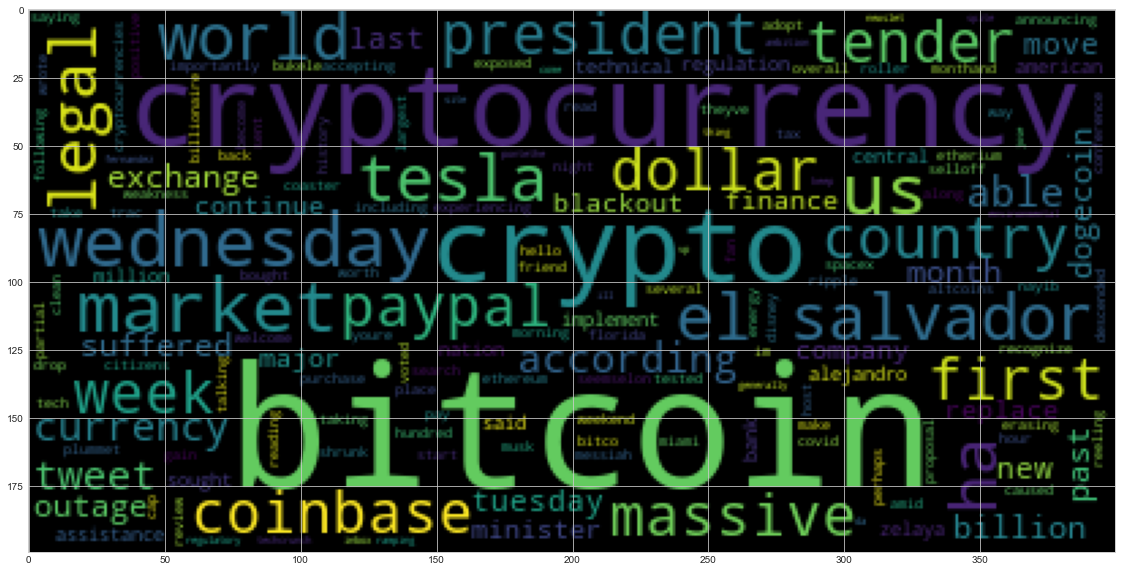

In [158]:
# Generate the Bitcoin word cloud
corpus = btc_df["description"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

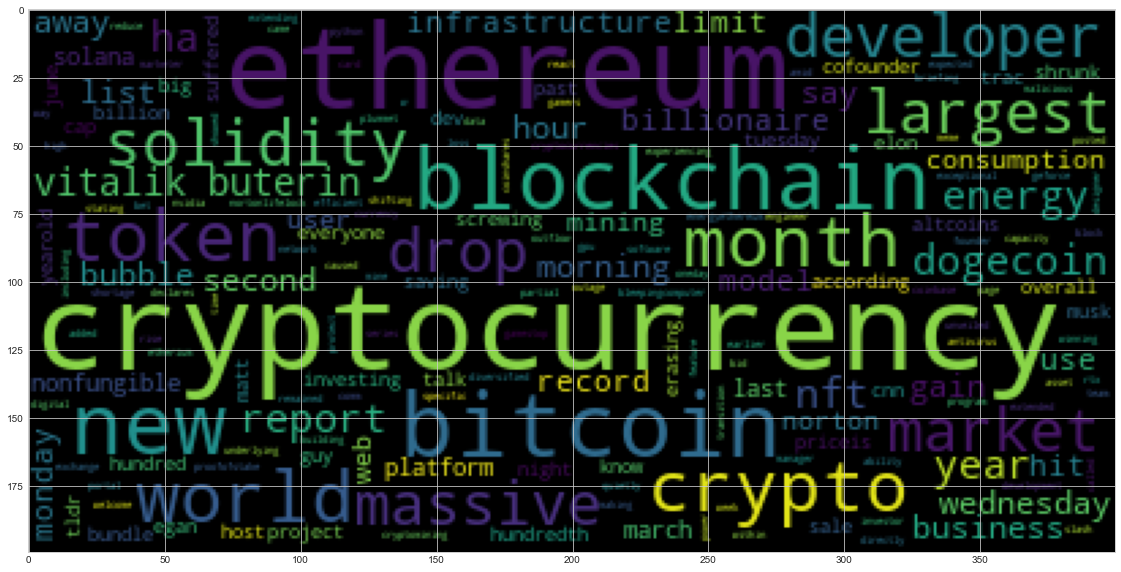

In [159]:
# Generate the Ethereum word cloud
corpus = eth_df["description"]

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [160]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

In [161]:
import spacy
from spacy import displacy

In [162]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 8.0 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [163]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [164]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df['description'].str.cat(sep=', ')

In [165]:
# Run the NER processor on all of the text
doc = nlp(concat_btc)


# Add a title to the document
doc.user_data['title']= "Bitcoin NER"

In [166]:
# Render the visualization
displacy.render(doc, style='ent')

In [167]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in doc.ents])

[('El Salvador', 'GPE'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'),
 ('Nayib Bukele', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Citizens', 'ORG'),
 ('Coinbase', 'PERSON'),
 ('Bitcoin, Etherium', 'ORG'),
 ('Dogecoin', 'GPE'),
 ('Tesla', 'ORG'),
 ('Dogecoin', 'GPE'),
 ('this month', 'DATE'),
 ('Elon Musk', 'PERSON'),
 ('Tesla', 'PERSON'),
 ('the past few months', 'DATE'),
 ('first', 'ORDINAL'),
 ('Tesla', 'ORG'),
 ('$1.5 billion', 'MONEY'),
 ('Bitcoin, Ethereum', 'ORG'),
 ('Altcoins', 'PERSON'),
 ('Tuesday night', 'TIME'),
 ('Wednesday', 'DATE'),
 ('morning', 'TIME'),
 ('months', 'DATE'),
 ('hundreds of billions', 'MONEY'),
 ('more than 20%', 'PERCENT'),
 ('the past 24 hours', 'TIME'),
 ('Coinbase', 'ORG'),
 ('first', 'ORDINAL'),
 ('Miami', 'GPE'),
 ('Florida', 'GPE'),
 ('last weekend', 'DATE'),
 ('covid-19', 'PERSON'),
 ('Last week', 'DATE'),
 ('Disney', 'ORG'),
 ('This week', 'DATE'),
 ('Wednesday', 'DATE'),
 ('Jose Fernandez da Ponte', 'PERSON'),
 ('US', 'GPE'),
 ('US', 'GPE'),
 ('Ir

---

### Ethereum NER

In [168]:
# Concatenate all of the Ethereum text together
concat_btc = eth_df['description'].str.cat(sep=', ')

In [169]:
# Run the NER processor on all of the text
docs = nlp(concat_btc)

# Add a title to the document
docs.user_data['title']= "Ethereum NER"

In [170]:
# Render the visualization
displacy.render(doc, style='ent')

In [171]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in docs.ents])

[('21.25', 'MONEY'),
 ('June 17', 'DATE'),
 ('97%', 'PERCENT'),
 ('Solidity Blockchain Dev', 'PERSON'),
 ('Bitcoin, Ethereum', 'ORG'),
 ('Altcoins', 'PERSON'),
 ('Tuesday night', 'TIME'),
 ('Wednesday', 'DATE'),
 ('morning', 'TIME'),
 ('months', 'DATE'),
 ('hundreds of billions', 'MONEY'),
 ('more than 20%', 'PERCENT'),
 ('the past 24 hours', 'TIME'),
 ('Vitalik Buterin', 'PERSON'),
 ('27-year-old', 'DATE'),
 ('second', 'ORDINAL'),
 ('Ethereum', 'ORG'),
 ('Elon Musk', 'PERSON'),
 ("CNN Business'", 'ORG'),
 ('Matt Egan', 'PERSON'),
 ('Project', 'ORG'),
 ('months', 'DATE'),
 ('hundredth', 'CARDINAL'),
 ('second', 'ORDINAL'),
 ('just “months', 'DATE'),
 ('more than 8%', 'PERCENT'),
 ('Monday', 'DATE'),
 ('2,587', 'MONEY'),
 ('40%', 'PERCENT'),
 ('above $4,300', 'MONEY'),
 ('earlier this month', 'DATE'),
 ('NVIDIA', 'ORG'),
 ('GPU', 'ORG'),
 ('GeForce', 'ORG'),
 ('30', 'CARDINAL'),
 ('Coinbase', 'PERSON'),
 ('Bitcoin, Etherium', 'ORG'),
 ('Dogecoin', 'GPE'),
 ('Vitalik Buterin', 'PERSON'),

---